# Lecture 12의 데모

### Lecture 12의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec19.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec20.ipynb

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## **Comparing Two Samples**

In [3]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [4]:
def ounces_to_kg(ounces):
  return ounces * 0.02835

In [5]:
births_weight = births.apply(ounces_to_kg, 'Birth Weight')

In [6]:
births = births.drop('Birth Weight').with_column('Birth Weight',births_weight)

In [7]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,3.402
False,3.20355
True,3.6288
True,3.0618
False,3.8556
False,3.9123
False,3.7422
False,3.402
True,4.05405
False,3.969


In [8]:
smoking_and_birthweight.group('Maternal Smoker')
# 담배 핀 사람 / 안핀 사람 수를 세자

Maternal Smoker,count
False,715
True,459


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


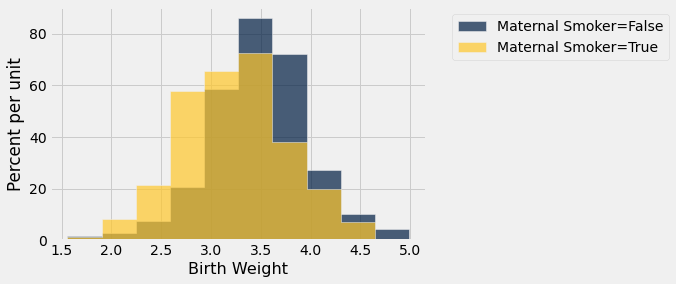

In [9]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker') # 이런 식으로 그룹별로 나눠서 히스토그램 그리기!

## **Test Statistic**

In [10]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,3.48947
True,3.22677


In [11]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

# 담배 안핀 산모 애기의 몸무게 평균 - 담배 핀 산모 애기의 몸무게 평균

-0.26269514191690657

In [12]:
def difference_of_means(table, numerical_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group variable

    Returns: Difference of means of the two groups
    """

    # 위에 과정을 반복해낼 생각임 그래서 이걸 하나의 함수로 만들어 낼 생각임!
    # table with the two relevant columns
    reduced = table.select(numerical_label, group_label)

    # table containing group means
    means_table = reduced.group(group_label, np.average)

    # array of group means
    means = means_table.column(1)

    # return the difference of means
    return means.item(1) - means.item(0)

In [13]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker') # 앞의 과정 자동화 ^ㅁ^

-0.26269514191690657

## **Random Permutation (Shuffling)** ##

In [14]:
letters = Table().with_column('Letter', make_array('a','b','c','d','e'))

In [17]:
letters.sample(2)

Letter
d
b


In [18]:
letters.sample(2, with_replacement=False)

Letter
b
e


In [19]:
letters.sample() # 원래 행의 수만큼 랜덤하게 뽑아냄

Letter
e
e
b
e
d


In [20]:
letters.sample(with_replacement=False)

Letter
b
e
a
d
c


In [21]:
# 셔플해서 새로운 lable된 것을 테이블에 붙여주는 작업 ~ 앞에 담배 핀 사람 / 안핀 사람 labeling된 것을 rearrange 해주는 것임. (null hypothesis 증명을 위해)
letters.with_column('Shuffled', letters.sample(with_replacement=False).column('Letter'))

Letter,Shuffled
a,e
b,b
c,d
d,c
e,a


--> Lecture Note로 돌아감

## **Simulation Under Null Hypothesis**

In [22]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,3.402
False,3.20355
True,3.6288
True,3.0618
False,3.8556
False,3.9123
False,3.7422
False,3.402
True,4.05405
False,3.969


In [ ]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False).column('Maternal Smoker')
shuffled_labels

# 이렇게 smoking 여부를 계속해서 섞어서 label에 넣어줄 생각임

In [24]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,3.402,True
False,3.20355,False
True,3.6288,True
True,3.0618,False
False,3.8556,False
False,3.9123,False
False,3.7422,True
False,3.402,False
True,4.05405,False
False,3.969,True


In [25]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker') # 우리가 원래 관찰한 것

-0.26269514191690657

In [27]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label') # Label 새로 라벨링해서 평균 차이 계산한 것

-0.01899476347182194

## **Permutation Test**

In [28]:
def one_simulated_difference(table, numerical_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group variable

    Returns: Difference of means of the two groups after shuffling labels
    """

    # get the array of shuffled labels - 셔플한 label 만들기
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    # table of numerical column & shuffled column
    shuffled_table = table.with_column('Shuffled Label', shuffled_labels)

    return difference_of_means(shuffled_table, numerical_label, 'Shuffled Label')

In [30]:
# 할때마다 diff 다르게 나오는걸 만들어 낼 수 있을 것임!
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

-0.03998767996709196

In [31]:
differences = make_array()

# 반복해서 shuffle하고 그걸로 다시 평균낸거 차이 만든걸 하나의 분포로 나타내기 위함
for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

Observed Difference: -0.26269514191690657


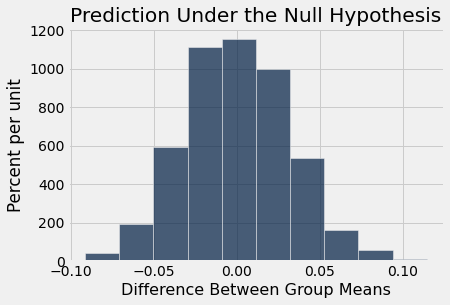

In [32]:
diff_tbl = Table().with_column('Difference Between Group Means', differences)
diff_tbl.hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

## **Randomized Control Experiment**

* 무작위 대조 시험(randomized control trial; RCT)으로 보툴리눔 독소 A(Botulinum Toxin A; BTA)를 치료제로 사용하는 효과를 조사

* 요통이 있는 31명의 환자를 치료 그룹 및 통제 그룹으로 무작위로 나누어, 15명은 치료 그룹에, 16명은 통제 그룹에

* 대조군에게는 정상적인 식염수를 투여

* 실험은 의사나 환자 모두 그들이 어느 그룹에 속해 있는지 알 수 없도록 double blind로 실행

* 연구 시작 8주 후, 치료 그룹의 15명 중 9명과 대조 그룹의 16명 중 2명이 통증 완화

In [33]:
# 플라시보 없애려고 대조군에게 식염수 투여
# 환자도 의사도 모르는 실험 -> double blind - 의사도 자기가 주는게 보톡스인지 식염수인지 알지 못함
# 통증 완화에 대한 판단은 나름의 준거를 가지고 판단하게 됨
botox = Table.read_table('bta.csv')
botox.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [34]:
botox.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


## **Testing the Hypothesis**

In [35]:
observed_diff = difference_of_means(botox, 'Result', 'Group') # Observed
observed_diff

0.475

In [36]:
one_simulated_difference(botox, 'Result', 'Group') # Simulation

-0.041666666666666685

In [37]:
simulated_diffs = make_array()

for i in np.arange(10000):
  sim_diff = one_simulated_difference(botox, 'Result', 'Group')
  simulated_diffs = np.append(simulated_diffs, sim_diff)

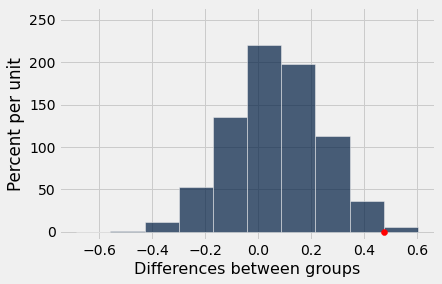

In [38]:
col_name = 'Differences between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)
plots.ylim(-0.1, 2.65)
plots.scatter(observed_diff, 0, c='red', zorder=3)

In [39]:
sum(simulated_diffs >= observed_diff) / len(simulated_diffs)

0.0076